Solving the Schroedinger Equation for two electrons in an infinite square well by Finite Difference Method (J. Chem. Phys. 47, 454 (1967))

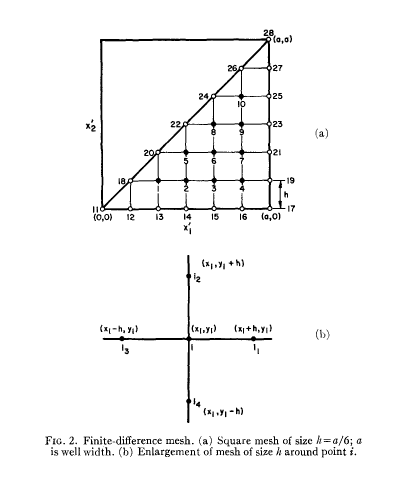 [taken from J. Chem. Phys 47,454 (1967)]
The one-dimensional system of two electrons in a infinte square well is represented by the corrdinate system $[x_1',x_2']$ and the time-independent Schroedinger equation reads as:
$$ H'\psi(x_1',x_2') = E\psi(x_1',x_2') 1) $$ where $ H'$ is the hamiltonian:
$$  H' = \frac{1}{2}[(\partial^2 /\partial x_1'^2) + (\partial^2 /\partial x_2'^2) + 1/|x_1' -x_2'|]$$ 
In the FD method the solution of eq. 1 is expressed by a set of numbers ($\psi_i$) approximating the values of the wavefunction at the grid points. The (empty) circles in Fig.2 represent the boundary points where the wavefunction is zero. 

In [1]:
import os
import sys
sys.path.insert(0, "../src")
import mesh

In [8]:
# set grid options (also passed as input..)
margin = 4.0
npoint = 20 # edge points
h = margin/(npoint-1) # grid step
get_state = 4
grid,psi=mesh.main(npoint,margin,h,get_state)

number of interior points: 153

Hamiltonian is symm?
True
Eigenvalues e1, e2 ..
[2.28268434 3.97084398 4.80544326]
doing the upper half part...
Hamiltonian is symm?
True
Eigenvalues e1, e2 ..
[2.28268434 3.97084398 4.80544326]
n. points of lower half grid: 153

n. points of upper half grid: 153

n. int. grid point: 306

total grid length: 400


In [9]:
import numpy as np
x = grid[:,0]
y = grid[:,1]
z = psi
grid_x, grid_y = np.mgrid[min(x):max(x):20j, min(y):max(y):20j]
from scipy.interpolate import griddata

grid_z0 = griddata(grid, z, (grid_x, grid_y), method='nearest')

grid_z1 = griddata(grid, z, (grid_x, grid_y), method='linear')

grid_z2 = griddata(grid, z, (grid_x, grid_y), method='cubic')

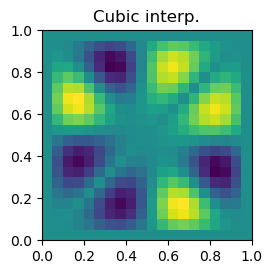

In [10]:
import matplotlib.pyplot as plt



#plt.subplot(222)

#plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')

#plt.title('Nearest')

#plt.subplot(223)

#plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')

#plt.title('Linear')

plt.subplot(224)

plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')

plt.title('Cubic interp.')

plt.gcf().set_size_inches(6, 6)

plt.show()


/tmp/ipykernel_29937/1629526616.py:17: DeprecationWarning: scipy.concatenate is deprecated and will be removed in SciPy 2.0.0, use numpy.concatenate instead
  DATA = concatenate((X_flat, Y_flat, Z_flat), axis=1)


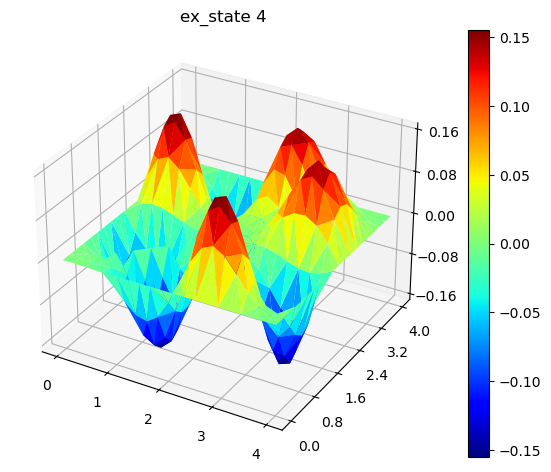

In [11]:
import matplotlib
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


from numpy.random import randn, shuffle
from scipy import linspace, meshgrid, arange, empty, concatenate, newaxis, shape
# =======================
## re-shaping data in 1D:

# flat and prepare for concat:
X_flat = grid_x.flatten()[:, newaxis]
Y_flat = grid_y.flatten()[:, newaxis]
Z_flat = grid_z2.flatten()[:, newaxis]

DATA = concatenate((X_flat, Y_flat, Z_flat), axis=1)

shuffle(DATA)

Xs = DATA[:,0]
Ys = DATA[:,1]
Zs = DATA[:,2]


# ====================================================
## plotting surface using X, Y and Z given as 1D data:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_trisurf(Xs, Ys, Zs, cmap=cm.jet, linewidth=0)
fig.colorbar(surf)

var_title = "ground_state"

if get_state != 0:
    var_title = "ex_state " + str(get_state)

title = ax.set_title(var_title)
title.set_y(1.01)

ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(6))
ax.zaxis.set_major_locator(MaxNLocator(5))

fig.tight_layout()
fig.savefig('plot.png')